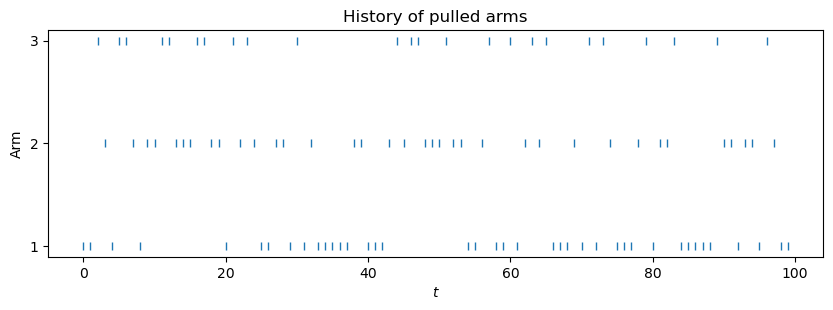

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

verbose = False

n = 100  #time-horizon
k = 3    #number of arms

w = 20   #window size (for plot averaging)

T = np.arange(n)        #range for time
K = np.arange(1, k+1)   #range for arms

H = np.random.randint(low=1, high=k+1, size=n)   #history of actions (pulled arms)

my_dpi = 100
fig_width = 1000/my_dpi

plt.figure(figsize=(fig_width, k*100/my_dpi), dpi=my_dpi)

if verbose:
    print("H:")
    print(H)

plt.plot(H, '|')

plt.yticks(K)

plt.xlabel('$t$')
plt.ylabel('Arm')
plt.title('History of pulled arms')

plt.show()

In [2]:
def prog_avg(x):
    s = np.cumsum(x, dtype=float)
    return np.array([s[i]/(i+1) for i in range(len(x))])

def win_avg(x, w, compensate=False):
    cum_sum = np.cumsum(x, dtype=float)
    valid_y = np.true_divide(np.subtract(cum_sum[w:], cum_sum[:-w]), float(w))
    if compensate:
        begin_y = np.true_divide(cum_sum[:w], range(1,w+1))
    else:
        begin_y = np.true_divide(cum_sum[:w], float(w))
    return np.append(begin_y, valid_y)

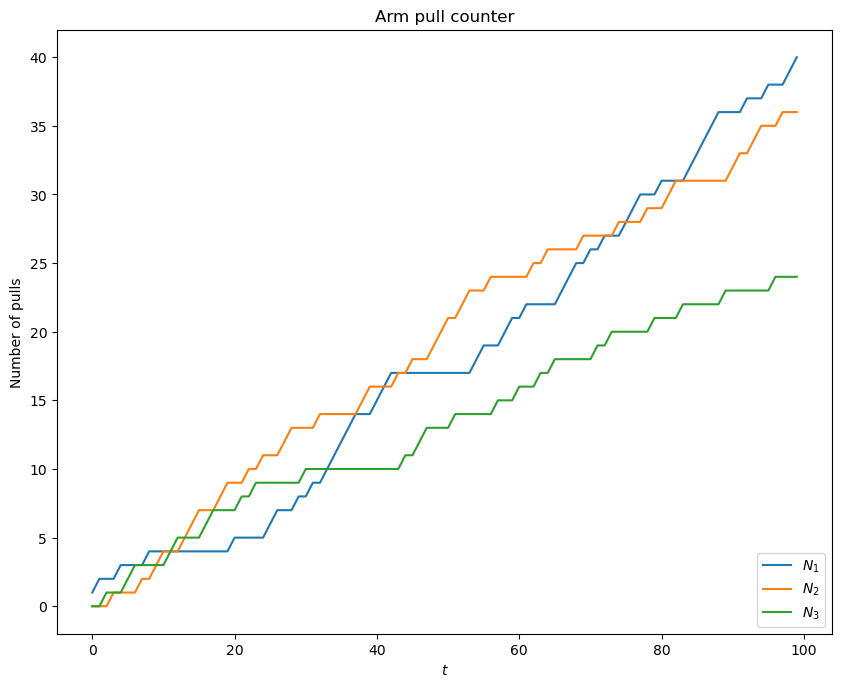

In [3]:
H_a = np.array([[1 if (H[t]==a) else 0 for t in T] for a in K])

N_a = np.cumsum(H_a, axis=1)

if verbose:
    print("H_a:")
    print(H_a)
    print("N_a:")
    print(N_a)

plt.figure(figsize=(fig_width, 800/my_dpi), dpi=my_dpi)

for i in range(k): 
    plt.plot(N_a[i], label=f"$N_{i+1}$") 
    
plt.xlabel('$t$')
plt.ylabel('Number of pulls')
plt.title('Arm pull counter')

plt.legend(loc='lower right');

plt.show()

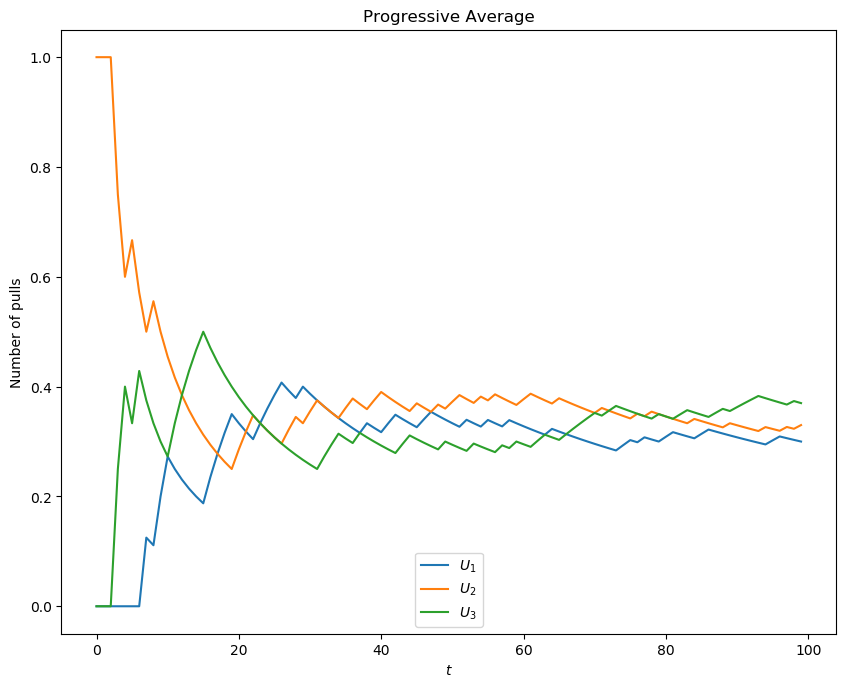

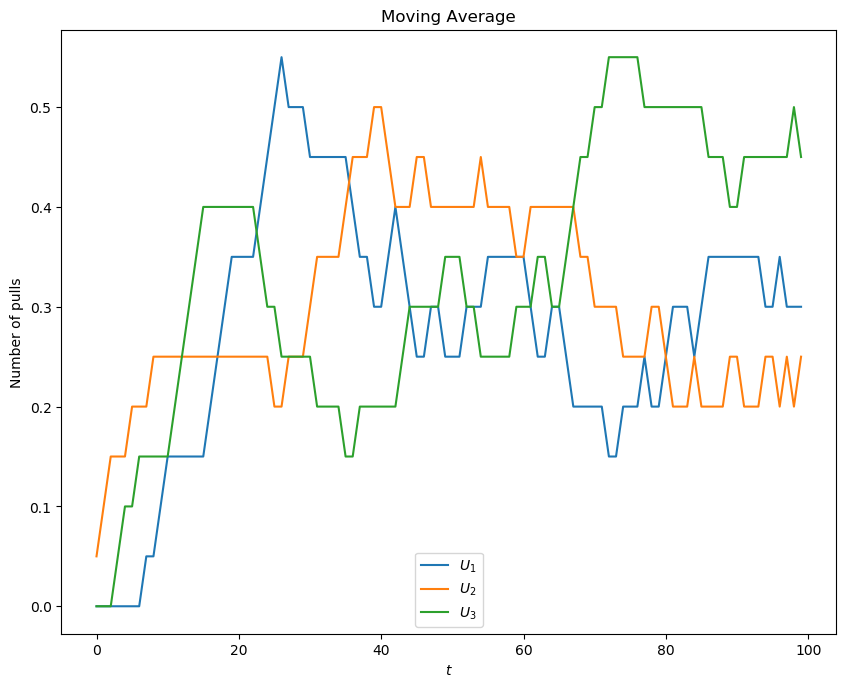

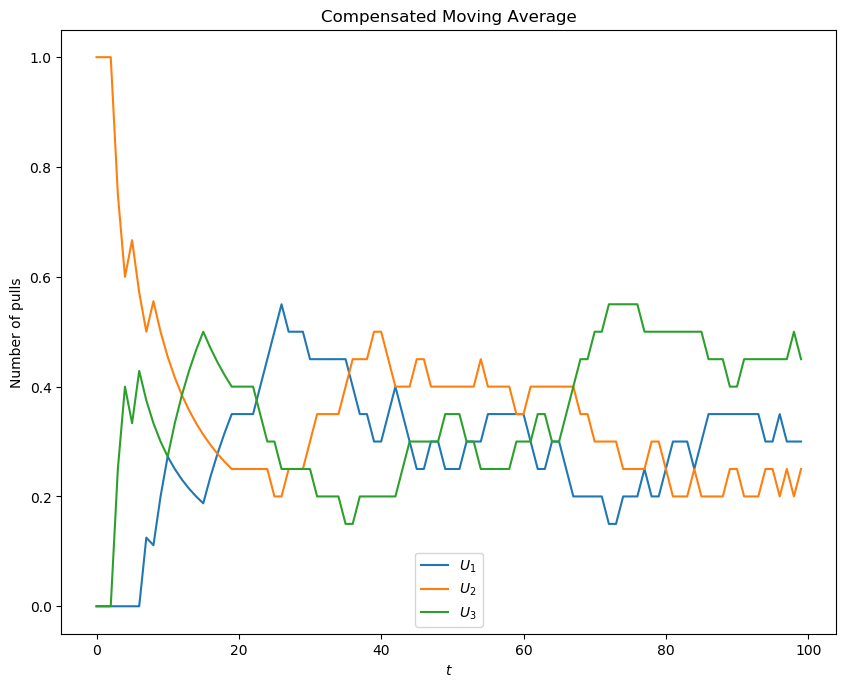

In [103]:
U1_a = np.array([win_avg(H_a[i], w) for i in range(k)])
U2_a = np.array([win_avg(H_a[i], w, compensate=True) for i in range(k)])
U3_a = np.array([prog_avg(H_a[i]) for i in range(k)])

plt.figure(figsize=(fig_width, 800/my_dpi), dpi=my_dpi)

for i in range(k): 
    plt.plot(U3_a[i], label=f"$U_{i+1}$")

plt.xlabel('$t$')
plt.ylabel('Number of pulls')
plt.title('Progressive Average')

plt.legend(loc='lower center');
plt.show()

plt.figure(figsize=(fig_width, 800/my_dpi), dpi=my_dpi)

for i in range(k): 
    plt.plot(U1_a[i], label=f"$U_{i+1}$")

plt.xlabel('$t$')
plt.ylabel('Number of pulls')
plt.title('Moving Average')

plt.legend(loc='lower center');
plt.show()


plt.figure(figsize=(fig_width, 800/my_dpi), dpi=my_dpi)

for i in range(k): 
    plt.plot(U2_a[i], label=f"$U_{i+1}$")

plt.xlabel('$t$')
plt.ylabel('Number of pulls')
plt.title('Compensated Moving Average')

plt.legend(loc='lower center');
plt.show()

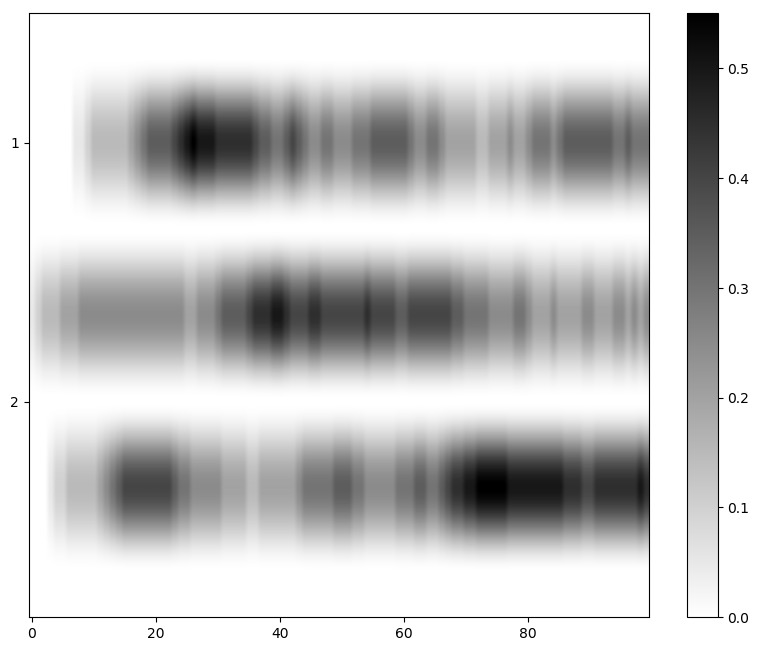

In [137]:
def plot_freq(plt, matrix, interpolation='hanning', cmap='gray_r'):
    
    k = len(matrix)      #number os arms (series)
    n = len(matrix[0])   #time-horizon (number of samples)
    
    w = 2        #bar width (>1)
    h = k*w+1    #fig height
    
    U = np.zeros([h,n])   #image map
    
    for i in range(h):
        if (i % w != 0):
            U[i] = U1_a[i//w]

    #from scipy import interpolate
    #f = interpolate.interp1d(np.arange(k*2+1), U, axis=0)
    
    #print(f)

    plt.imshow(U, aspect="auto", interpolation=interpolation, cmap=cmap)
    plt.yticks(np.arange(1, h, step=3), K)

plt.figure(figsize=(fig_width, 800/my_dpi), dpi=my_dpi)

plot_freq(plt, U1_a)

plt.xlabel('$t$')
plt.ylabel('Local Frequency')
plt.title('Compensated Moving Average')

plt.colorbar()
plt.show()